This project delves into the world of unsupervised clustering, where we'll analyze customer data from a grocery store's database. By segmenting customers, we aim to identify distinct groups based on shared characteristics. This allows us to categorize customers strategically, maximizing their value to the business.

* ID: Customer's unique identifier.
* Year_Birth: Customer's birth year.
* Education: Customer's education level.
* Marital_Status: Customer's marital status.
* Income: Customer's yearly household income.
* Kidhome: Number of children in customer's household.
* Teenhome: Number of teenagers in customer's household.
* Dt_Customer: Date of customer's enrollment with the company.
* Recency: Number of days since customer's last purchase.
* Complain: 1 if customer complained in the last 2 years, 0 otherwise.

 * MntWines: Amount spent on wine in last 2 years
 * MntFruits: Amount spent on fruits in last 2 years
 * MntMeatProducts: Amount spent on meat in last 2 years
 * MntFishProducts: Amount spent on fish in last 2 years
 * MntSweetProducts: Amount spent on sweets in last 2 years
 * MntGoldProds: Amount spent on gold in last 2 years

 * NumDealsPurchases: Number of purchases made with a discount
 * AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
 * AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
 * AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
 * AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
 * AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

## IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## LOADING DATA

In [ ]:
df=pd.read_csv('/content/marketing_campaign.csv', sep = "\t")

## Basic EDA

In [ ]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
df.columns.tolist()

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

## DATA CLEANING AND FEATURE ENGINEERING

In [ ]:
df["Age"]= 2024 - df["Year_Birth"]
df.drop(columns=['Year_Birth','ID'],axis=1)

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,...,0,0,0,0,0,0,3,11,1,67
1,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,...,0,0,0,0,0,0,3,11,0,70
2,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,...,0,0,0,0,0,0,3,11,0,59
3,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,...,0,0,0,0,0,0,3,11,0,40
4,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,...,0,0,0,0,0,0,3,11,0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,...,0,0,0,0,0,0,3,11,0,57
2236,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,...,0,0,0,1,0,0,3,11,0,78
2237,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,...,0,1,0,0,0,0,3,11,0,43
2238,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,...,0,0,0,0,0,0,3,11,0,68


<Axes: xlabel='Education'>

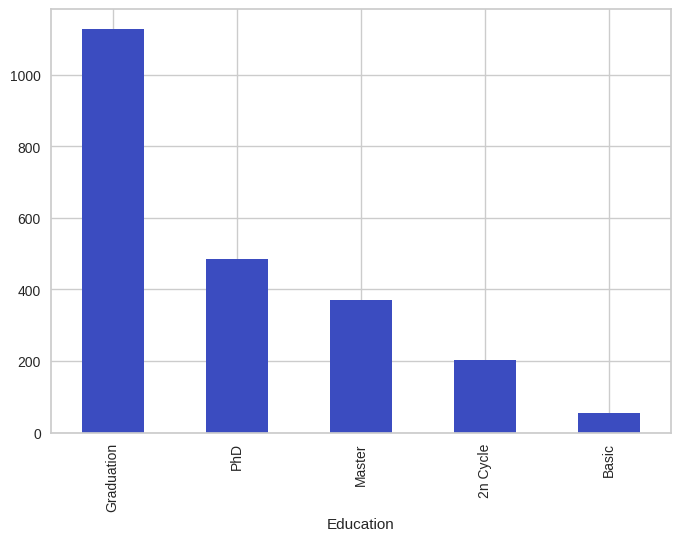

In [ ]:
df.Education.value_counts().plot(kind = "bar",cmap='coolwarm')

Nearly half of the population have obtained a graduate degree, followed by a substantial portion holding PhD and master's degrees, indicating a high level of educational attainment. Conversely, a relatively small segment of the population has only completed basic education, which represents the bare minimum of scholastic achievement.

In [ ]:
df.groupby("Education")["Income"].mean()

Education
2n Cycle      47633.190000
Basic         20306.259259
Graduation    52720.373656
Master        52917.534247
PhD           56145.313929
Name: Income, dtype: float64

clearly people who have higer education are earning more

<Axes: xlabel='Marital_Status'>

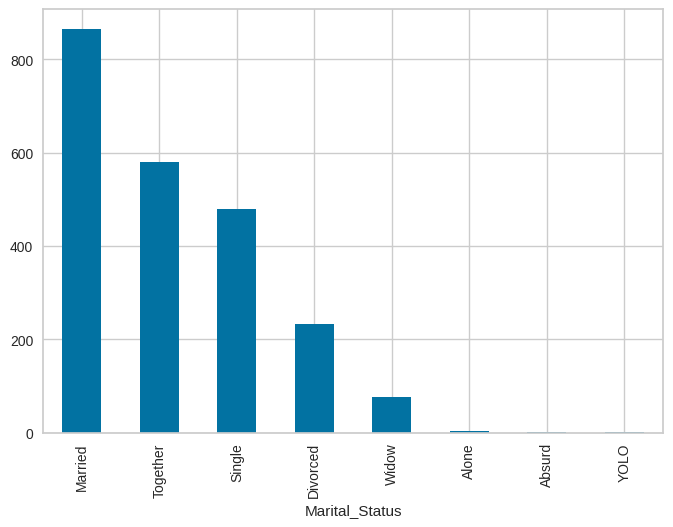

In [ ]:
df.Marital_Status.value_counts().plot(kind = "bar")

In [ ]:
df.groupby("Marital_Status")["Income"].mean()

Marital_Status
Absurd      72365.500000
Alone       43789.000000
Divorced    52834.228448
Married     51724.978996
Single      50995.350318
Together    53245.534031
Widow       56481.552632
YOLO        48432.000000
Name: Income, dtype: float64

<Axes: xlabel='Marital_Status'>

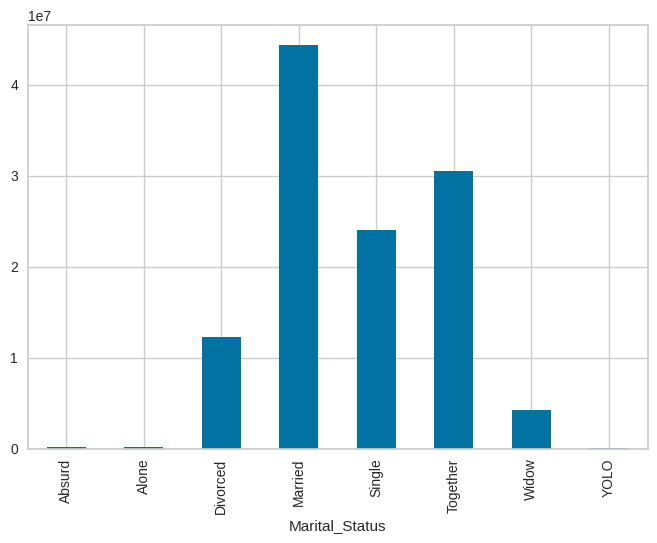

In [ ]:
df.groupby("Marital_Status")["Income"].sum().plot(kind = "bar")

<Axes: xlabel='Kidhome'>

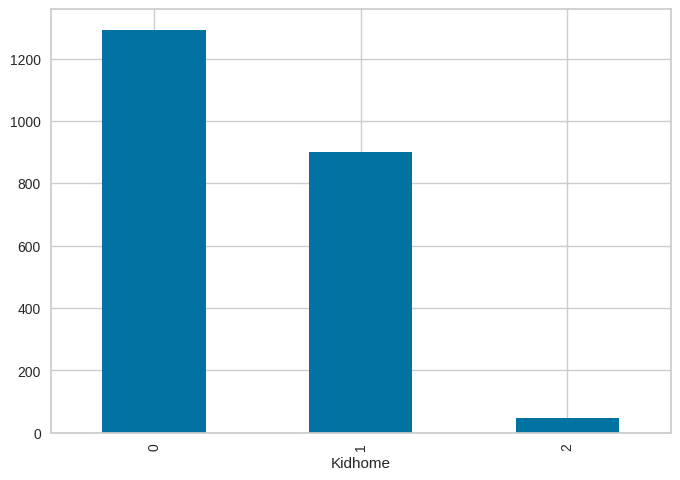

In [ ]:
df.Kidhome.value_counts().plot(kind = "bar")

<Axes: xlabel='Income', ylabel='Count'>

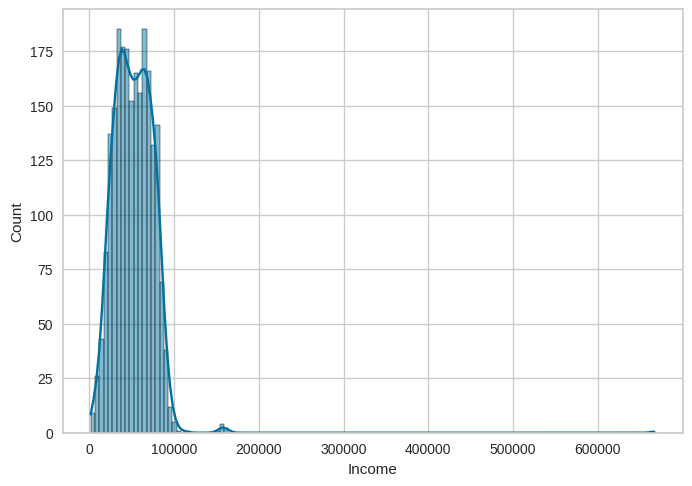

In [ ]:
sns.histplot(df.Income,kde=True)

<Axes: ylabel='Income'>

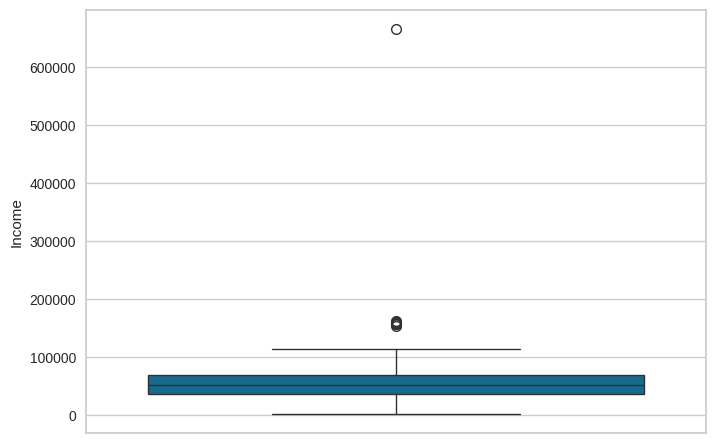

In [ ]:
sns.boxplot(df.Income)

Within the dataset, there exists a single individual whose income substantially deviates from the rest of the population, indicating the presence of an outlier. This outlier could potentially represent an exceptionally affluent person. To mitigate the influence of this anomalous data point on statistical analyses, it may be judicious to remove or truncate this outlier from the dataset.

In [ ]:
df.drop(np.where(df.Income>200000)[0],inplace=True)

<Axes: xlabel='Income', ylabel='Count'>

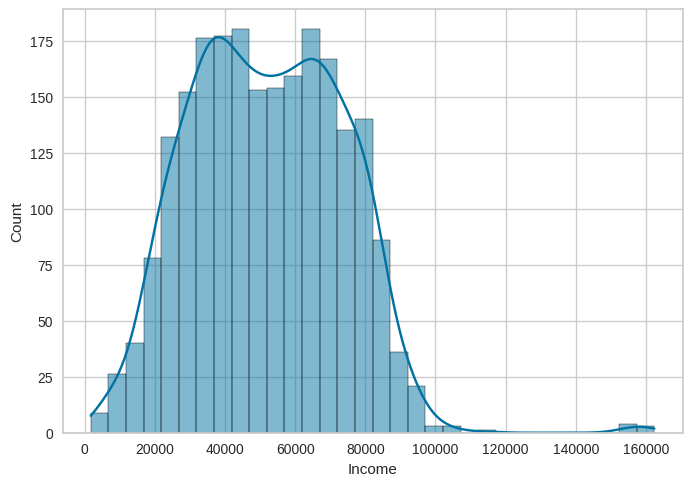

In [ ]:
sns.histplot(df.Income,kde=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2239 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2239 non-null   int64  
 1   Year_Birth           2239 non-null   int64  
 2   Education            2239 non-null   object 
 3   Marital_Status       2239 non-null   object 
 4   Income               2215 non-null   float64
 5   Kidhome              2239 non-null   int64  
 6   Teenhome             2239 non-null   int64  
 7   Dt_Customer          2239 non-null   object 
 8   Recency              2239 non-null   int64  
 9   MntWines             2239 non-null   int64  
 10  MntFruits            2239 non-null   int64  
 11  MntMeatProducts      2239 non-null   int64  
 12  MntFishProducts      2239 non-null   int64  
 13  MntSweetProducts     2239 non-null   int64  
 14  MntGoldProds         2239 non-null   int64  
 15  NumDealsPurchases    2239 non-null   int64 

NumDealsPurchases: Number of purchases made with a discount

Leaving it as it is for now, but in the future, it can be binned into some groups if further knowledge is obtained, especially regarding its relation with acceptedcmp.

In [ ]:
# corr=df['AcceptedCmp1'].corr(df['NumDealsPurchases']>10)
# print(corr)

<Axes: xlabel='NumDealsPurchases'>

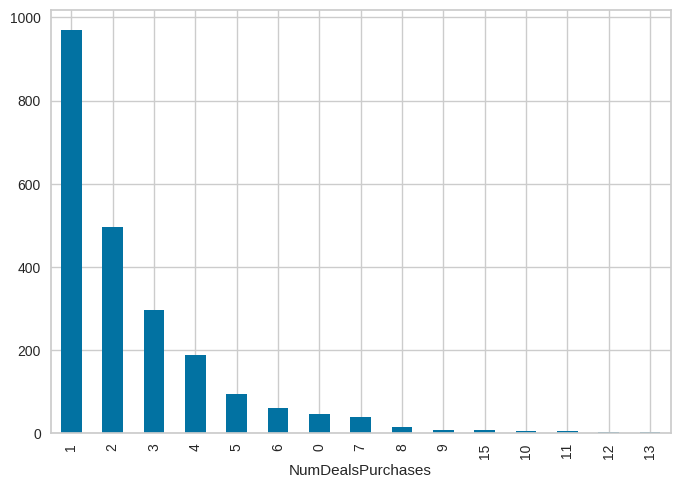

In [ ]:
df['NumDealsPurchases'].value_counts().plot(kind = "bar")

In [ ]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'Relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [ ]:
import missingno as mn

<Axes: >

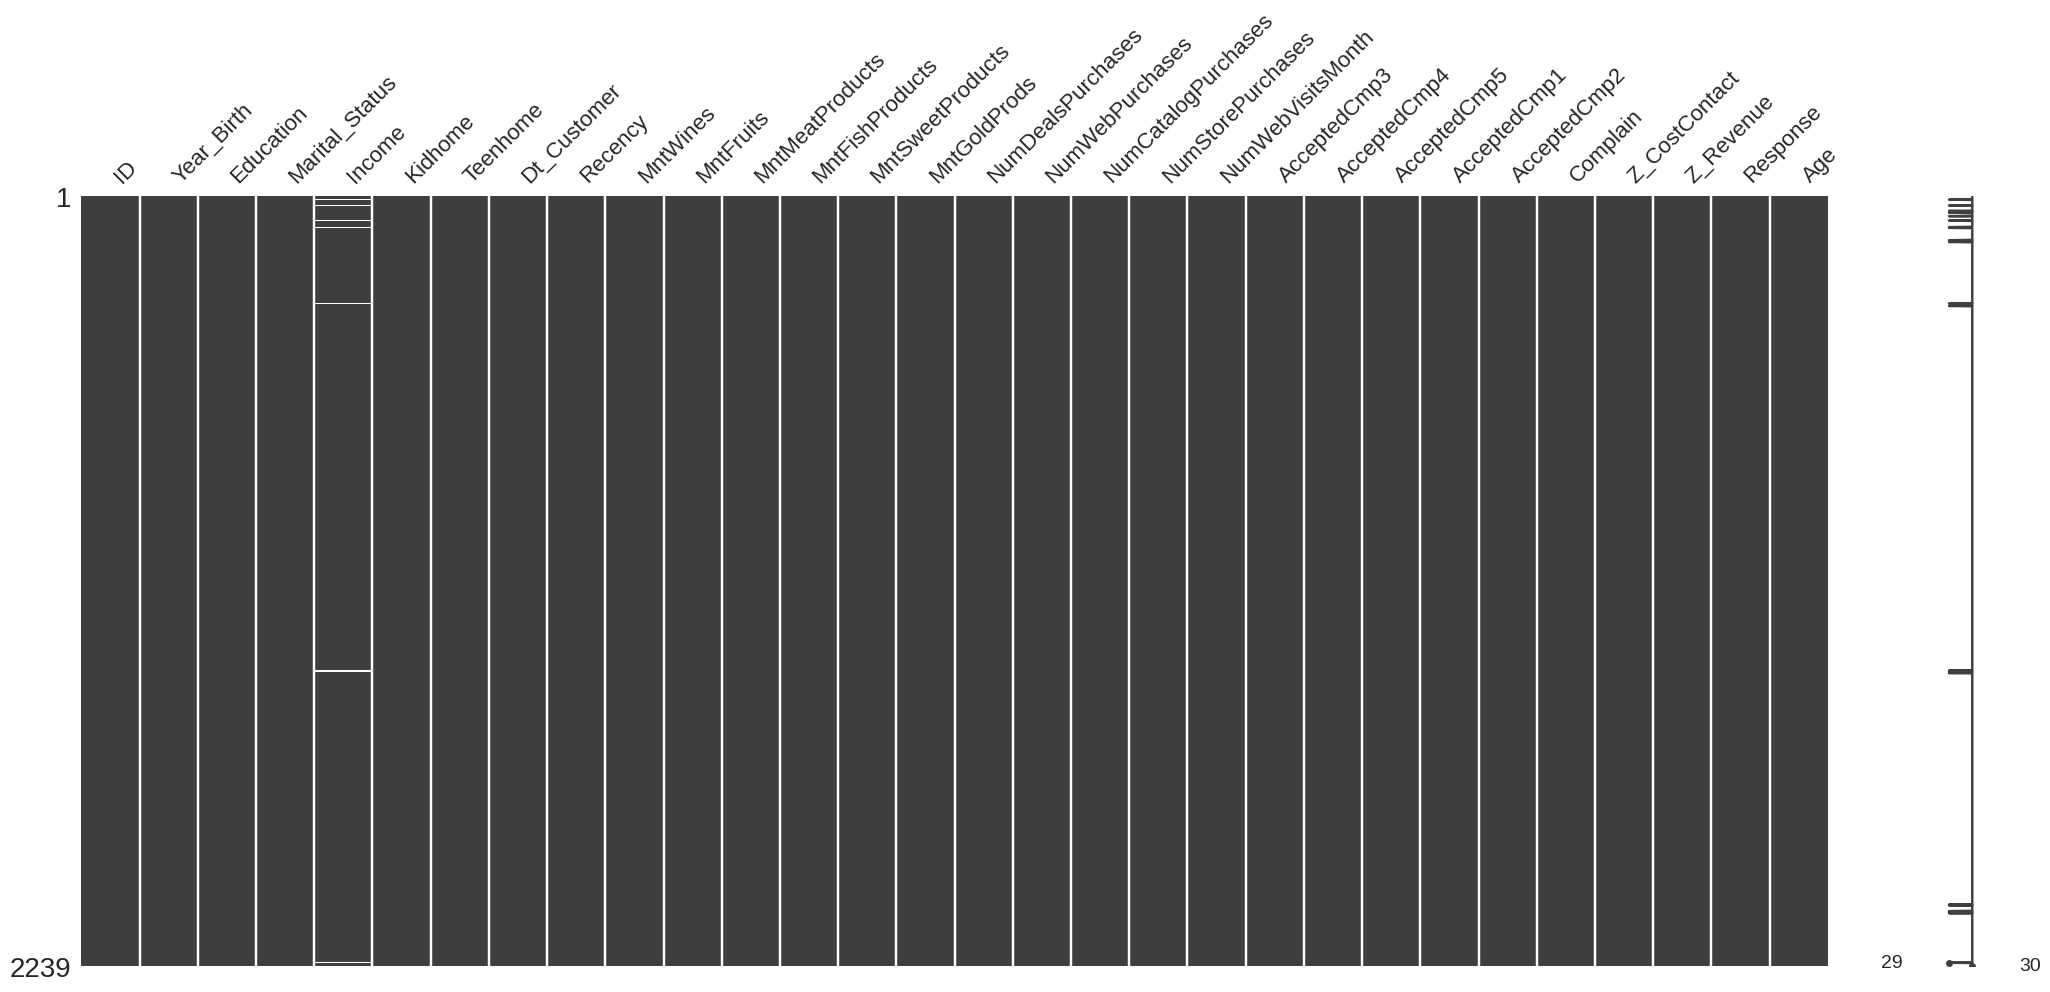

In [ ]:
mn.matrix(df)

In [ ]:
df['Income']=df['Income'].fillna(df['Income'].median())

In [ ]:
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age


In [ ]:
df.ID.nunique()

2239

there is no druplicate value

In [ ]:
df[['Z_CostContact', 'Z_Revenue','ID']].head()

,Z_CostContact,Z_Revenue,ID
0,3,11,5524
1,3,11,2174
2,3,11,4141
3,3,11,6182
4,3,11,5324


In [ ]:
df=df.drop(columns=["Z_CostContact", "Z_Revenue",'ID'],axis=1)

Due to the absence of clear definitions and descriptions regarding these columns, it is challenging to intuitively deduce their functionality or purpose within the dataset. Consequently,remove these columns.

In [ ]:
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Expenses'].head(10)

0    1617
1      27
2     776
3      53
4     422
5     716
6     590
7     169
8      46
9      49
Name: Expenses, dtype: int64

In [ ]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

In [ ]:
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [ ]:
col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5",
           "NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" ,
          "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

In [ ]:
df=df.drop(columns=col_del,axis=1)

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer, format='%d-%m-%Y')

In [ ]:
df['Dt_Customer'].min()

Timestamp('2012-07-30 00:00:00')

In [ ]:
df['Dt_Customer'].max()

Timestamp('2014-06-29 00:00:00')

In [ ]:
# Assuming that the last taken data is where it is updated

df['First_day'] = '01-01-2015'
df['First_day'] = pd.to_datetime(df.First_day)
df['Day_engaged'] = (df['First_day'] - df['Dt_Customer']).dt.days

In [ ]:
df.drop(columns=['Dt_Customer','First_day'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'Complain', 'Response', 'Age', 'Expenses',
       'TotalAcceptedCmp', 'NumTotalPurchases', 'Day_engaged'],
      dtype='object')

In [ ]:
obj = df.select_dtypes(include='object').columns

In [ ]:
obj

Index(['Education', 'Marital_Status'], dtype='object')

## ENCODING THE CATEGORICAL FEATURES

In [ ]:
df = pd.get_dummies(df,columns=obj,drop_first=True)

In [ ]:
df.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Complain',
       'Response', 'Age', 'Expenses', 'TotalAcceptedCmp', 'NumTotalPurchases',
       'Day_engaged', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Single'],
      dtype='object')

## DATA PREPROCESSING

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(df)

# Transform the data
scaled_data = scaler.transform(df)

## FEATURE SELECTION

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# Feature selection using PCA

# n PCA, n_components is a crucial parameter that determines the dimensionality of the data after transformation.
# It specifies the number of principal components (PCs) to retain from the original dataset.
pca = PCA(n_components=0.95)
pca.fit(scaled_data)

# Get the explained variance ratio
# pca.explained_variance_ratio_ will give you the explained variance ratio for each PC.
explained_variance_ratio = pca.explained_variance_ratio_

# Get the top most features
top_features = np.argsort(explained_variance_ratio)[::-1][:5]

# Print the top most features and their ratios
for i in top_features:
  print(f"Feature: {df.columns[i]}, Ratio: {explained_variance_ratio[i]}")

Feature: Year_Birth, Ratio: 0.20223150473717602
Feature: Income, Ratio: 0.13161475689883975
Feature: Kidhome, Ratio: 0.09384068674710803
Feature: Teenhome, Ratio: 0.07367150822594168
Feature: Recency, Ratio: 0.07177096129445469


In [ ]:
from sklearn.decomposition import PCA

# Create a PCA object with 10 components
pca = PCA(n_components=10)

# Fit the PCA object to the scaled data
pca.fit(scaled_data)

# Get the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Get the top 10 features with the highest explained variance ratio
top_features = np.argsort(explained_variance_ratio)[::-1][:10]

# Print the top 10 features
for i in top_features:
    print(df.columns[i])

Year_Birth
Income
Kidhome
Teenhome
Recency
Complain
Response
Age
Expenses
TotalAcceptedCmp


## DIMENSIONALITY REDUCTION

In [ ]:
#Initiating PCA to reduce dimentions aka features to 3

# For Visualization and dimentionlity reduction
pca = PCA(n_components=3)
pca.fit(scaled_data)
PCA_ds = pd.DataFrame(pca.transform(scaled_data), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2239.0,-1.586741e-18,1.854581,-4.216599,-1.618564,0.034671,1.467579,5.051592
col2,2239.0,-6.505639e-17,1.496145,-4.958876,-0.911864,0.000515,1.051882,7.779044
col3,2239.0,-9.996470e-17,1.263331,-2.722972,-1.195436,-0.080160,1.158356,2.880546


In [ ]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

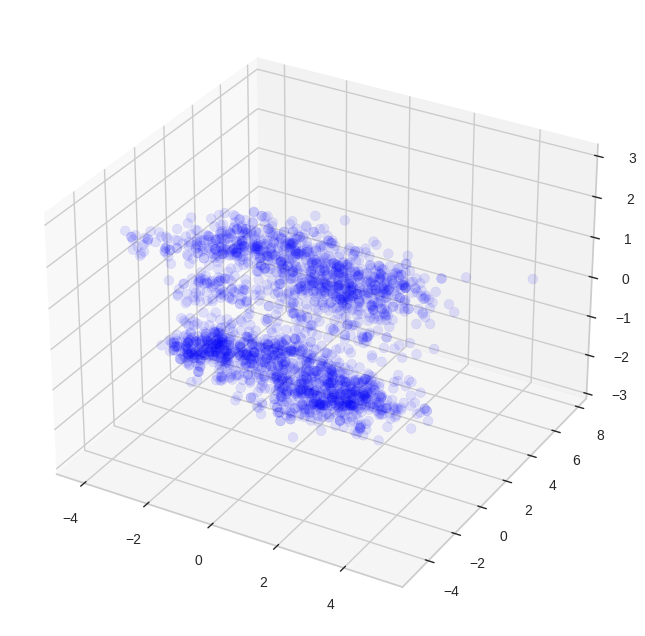

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(x, y, z, s=50, c='blue', alpha=0.1)


## ELBOW METHOD

Exploring KMeans Clustering

To achieve effective segmentation, we will be utilizing the KMeans clustering algorithm, a popular unsupervised machine learning technique known for its simplicity and efficiency. KMeans identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible. This method is particularly useful in the context of marketing, where understanding and visualizing customer groupings can directly inform and influence strategic decisions.

In this notebook, we will apply the KMeans algorithm to a dataset containing various customer attributes to identify meaningful segments. The analysis includes:

Data preprocessing suitable for KMeans.
Determining the optimal number of clusters.
Analyzing and profiling each customer segment to draw actionable insights.
The goal is to explore the dynamics of customer segmentation through KMeans clustering, and uncover actionable insights that can significantly enhance marketing strategies.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

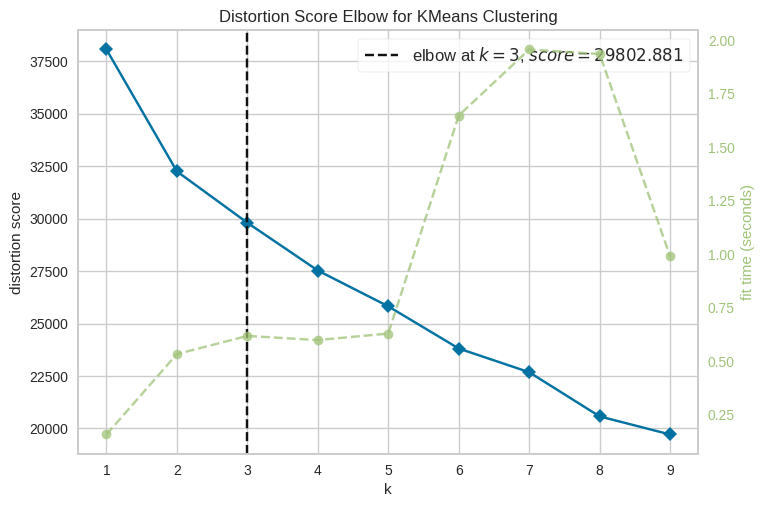

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Define the model
model = KMeans()

# Instantiate the visualizer
visualizer = KElbowVisualizer(model, k=(1, 10))

# Fit the data and visualize
visualizer.fit(scaled_data)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

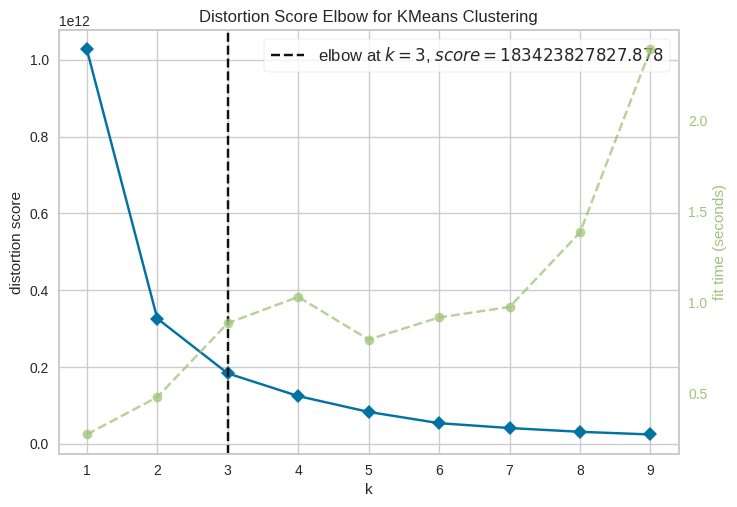

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(n_clusters=3)
visualizer = KElbowVisualizer(model, k=(1, 10))
visualizer.fit(df)
visualizer.show()




In [ ]:
from sklearn.metrics import silhouette_score

for n_clusters in range(2, 10):
  # Create an instance of the clustering model
  model = KMeans(n_clusters=n_clusters)

  # Fit the model to the data
  model.fit(df)

  # Calculate the silhouette score
  silhouette_avg = silhouette_score(df, model.labels_)

  # Print the silhouette score
  print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, the silhouette score is 0.5983715392030139


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, the silhouette score is 0.5437739320470257


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, the silhouette score is 0.524229630732932


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, the silhouette score is 0.5342267076135193


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, the silhouette score is 0.5406812152692219


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, the silhouette score is 0.5168396801941544


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, the silhouette score is 0.5153408174366201


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, the silhouette score is 0.5187309427007146


In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
#Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=2)
# fit model and predict clusters
lables = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = lables
#Adding the Clusters feature to the orignal dataframe.
# scaled_data["Clusters"]= yhat_AC

In [ ]:
unique_values = np.unique(lables)
print(unique_values)


[0 1]


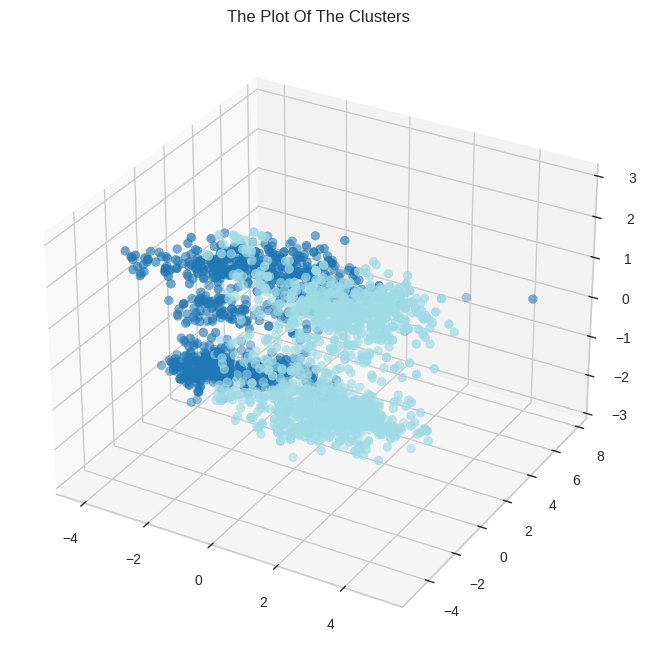

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = "tab20" )
ax.set_title("The Plot Of The Clusters")
plt.show()

In [ ]:
df.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Complain',
       'Response', 'Age', 'Expenses', 'TotalAcceptedCmp', 'NumTotalPurchases',
       'Day_engaged', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Single'],
      dtype='object')

In [ ]:
df_copy = df.copy()

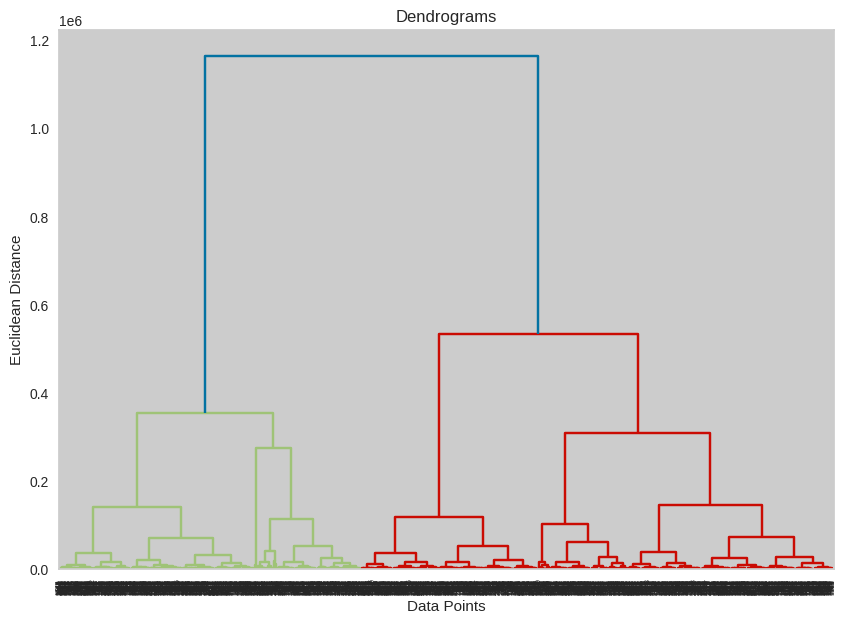

In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = sch.dendrogram(sch.linkage(df, method='ward'))
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


With this understanding in place, we can facilitate a comprehensive discussion with the marketing team to explore potential avenues for maximization.

In [ ]:
df_copy["Clusters"] = lables

<Axes: xlabel='Kidhome', ylabel='Income'>

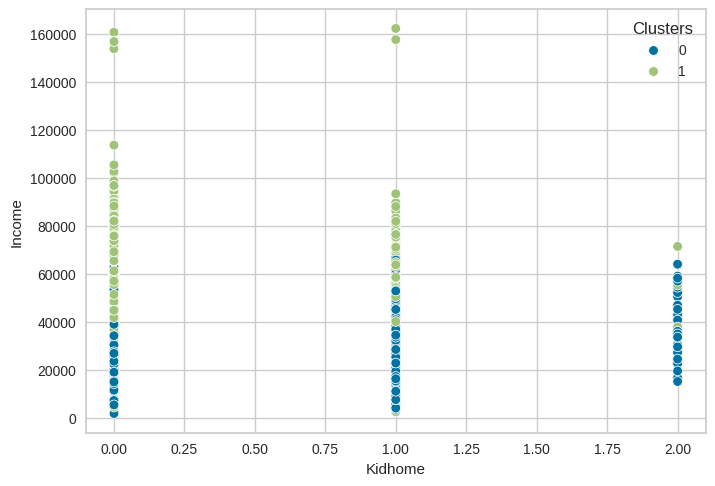

In [ ]:
sns.scatterplot(x=df_copy.Kidhome,y=df_copy.Income,hue=df_copy.Clusters)

<Axes: xlabel='Age', ylabel='Income'>

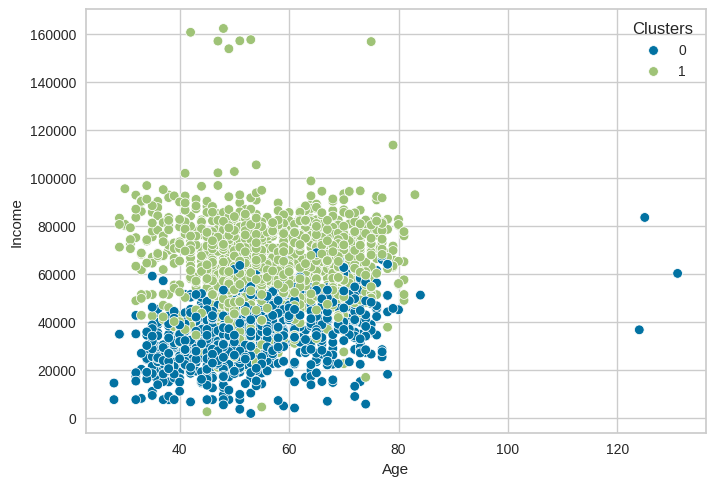

In [ ]:
sns.scatterplot(x=df_copy.Age,y=df_copy.Income,hue=df_copy.Clusters)

In [ ]:
df_copy.groupby(['Clusters']).agg({'Kidhome': 'mean', 'Income': 'mean', 'Expenses': 'mean', 'TotalAcceptedCmp': 'mean', 'NumTotalPurchases': 'mean'})

,Kidhome,Income,Expenses,TotalAcceptedCmp,NumTotalPurchases
Clusters,,,,,
0,0.787386,35032.594100,105.269583,0.055951,8.184130
1,0.175159,65214.295382,997.966561,0.487261,20.091561


## CONCLUSION

I analyzed customer data to uncover hidden segments. By first simplifying the data and then grouping similar customers together, I identified two distinct customer profiles. These profiles consider factors like family structure and spending habits. This information can be used to develop targeted marketing campaigns for each customer group.